<a href="https://colab.research.google.com/github/rehabm1996/Task/blob/main/week4_Task_1_Artificial_Neural_Networks_(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [92]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

but Gdown can't. Please check connections and permissions.


## Importing Libraries

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout,Rescaling
from sklearn.preprocessing import LabelEncoder , StandardScaler
import seaborn as sns

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [129]:
df = pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [131]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [132]:
df.isna().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [133]:
Cato = ['School_Year' ,'Run_Type' , 'Bus_No' , 'Route_Number' , 'Reason','Schools_Serviced','Occurred_On' ,'Created_On','Boro',
        'Bus_Company_Name' ,'How_Long_Delayed','Has_Contractor_Notified_Schools' , 'Has_Contractor_Notified_Parents',
        'Have_You_Alerted_OPT','Informed_On','Incident_Number','Last_Updated_On' , 'Breakdown_or_Running_Late','School_Age_or_PreK']

for col in Cato:
  print(df[col].value_counts())

School_Year
2016-2017    83141
2015-2016    63184
2017-2018     1646
2019-2020        1
Name: count, dtype: int64
Run_Type
Special Ed AM Run          85990
Pre-K/EI                   20951
Special Ed PM Run          17672
General Ed AM Run          17182
General Ed PM Run           4541
Special Ed Field Trip        628
General Ed Field Trip        570
Project Read PM Run          300
Project Read AM Run           47
Project Read Field Trip        2
Name: count, dtype: int64
Bus_No
9354     468
357      465
9302     434
118      357
9320     349
        ... 
20133      1
1140D      1
553D       1
160D       1
K9345      1
Name: count, Length: 10765, dtype: int64
Route_Number
1         2569
2         2217
3         1904
5         1740
4         1093
          ... 
26Q7MD       1
M688         1
JC-1         1
W656         1
1409B        1
Name: count, Length: 11283, dtype: int64
Reason
Heavy Traffic                  87426
Other                          21666
Mechanical Problem            

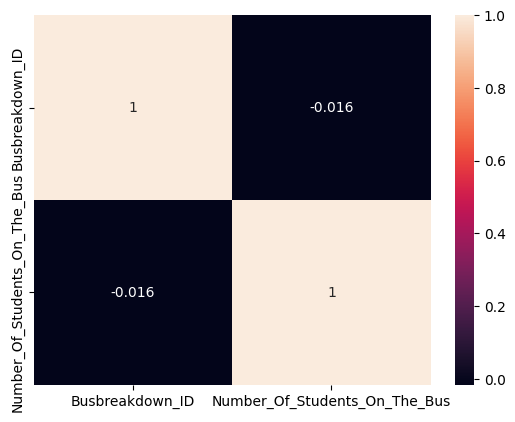

In [134]:
Numrical = ['Busbreakdown_ID' , 'Number_Of_Students_On_The_Bus']
Data = df[Numrical]
sns.heatmap(Data.corr() , annot=True)
plt.show()

<Axes: >

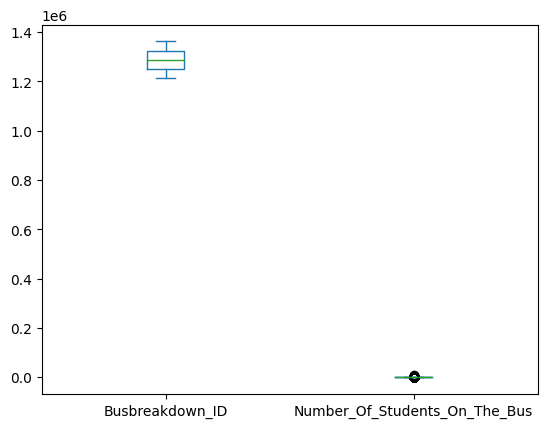

In [135]:
df[Numrical].plot(kind='box')

<Axes: ylabel='Frequency'>

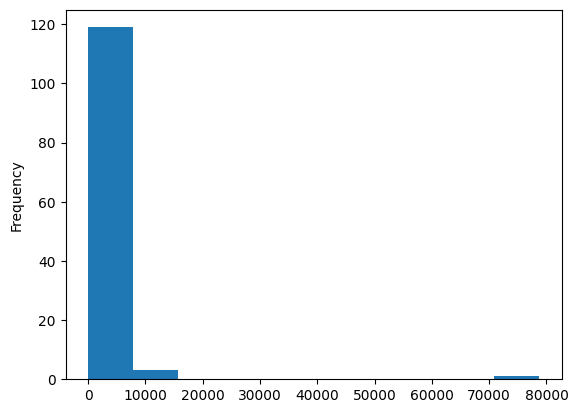

In [136]:
df['Number_Of_Students_On_The_Bus'].value_counts().plot(kind='hist')

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [137]:
df.drop('Incident_Number' , axis=1 , inplace=True)

In [138]:
df.drop('How_Long_Delayed' , axis=1 , inplace=True)

In [139]:
df.drop('Run_Type' , axis=1 , inplace=True)

In [140]:
df.drop('Busbreakdown_ID' , axis=1 , inplace=True)

In [141]:
df.drop('Schools_Serviced' , axis=1 , inplace=True)

In [142]:
df.drop('School_Age_or_PreK' , axis=1 , inplace=True)

In [143]:
df.drop('Boro' , axis=1 , inplace=True)

In [144]:
df.drop('Run_Type' , axis=1 , inplace=True)

KeyError: "['Run_Type'] not found in axis"

In [145]:
df.drop('Route_Number' , axis=1 , inplace=True)

In [146]:
df.drop('Reason' , axis=1 , inplace=True)

In [148]:
for i in df.columns:
  if df[i].dtype=='object':
    df[i]=LabelEncoder().fit_transform(df[i])

In [149]:
df.duplicated().sum()

36

In [152]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of         School_Year  Bus_No  Occurred_On  Created_On  Bus_Company_Name  \
0                 0    7481        56392       61017                27   
1                 0    8114        56698       61329                27   
2                 0    4662        48207       51829                27   
3                 0    4547        48064       51656                27   
4                 0    4554        48210       51836                27   
...             ...     ...          ...         ...               ...   
147967            1    8138        21443       23188                27   
147968            1      15        25138       27087                27   
147969            1    8642        33560       36071                26   
147970            1    6145        33561       36072                43   
147971            1    3502        33562       36073                70   

        Number_Of_Students_On_The_Bus  Has_Contractor_Notified_Schools  \
0                                   5                                1   
1                                   3                                1   
2                                  12                                1   
3                                  11                                1   
4                                  12                                1   
...                               ...                              ...   
147967                              7                                1   
147968                              0                                1   
147969                              0                                1   
147970                              0                                1   
147971                              7                                1   

        Has_Contractor_Notified_Parents  Have_You_Alerted_OPT  Informed_On  \
0                                     1                     0        61017   
1                                     1                     0        61329   
2                                     1                     1        51829   
3                                     1                     1        51656   
4                                     1                     0        51836   
...                                 ...                   ...          ...   
147967                                1                     0        23188   
147968                                1                     0        27087   
147969                                1                     1        36071   
147970                                1                     0        36072   
147971                                1                     1        36073   

        Last_Updated_On  Breakdown_or_Running_Late  
0                116763                          1  
1                117361                          1  
2                 98486                          1  
3                 98208                          1  
4                 98548                          1  
...                 ...                        ...  
147967            47628                          1  
147968            54720                          1  
147969            71979                          1  
147970            71978                          0  
147971            71980                          1  

[147972 rows x 12 columns]>

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 12 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   School_Year                      147972 non-null  int64
 1   Bus_No                           147972 non-null  int64
 2   Occurred_On                      147972 non-null  int64
 3   Created_On                       147972 non-null  int64
 4   Bus_Company_Name                 147972 non-null  int64
 5   Number_Of_Students_On_The_Bus    147972 non-null  int64
 6   Has_Contractor_Notified_Schools  147972 non-null  int64
 7   Has_Contractor_Notified_Parents  147972 non-null  int64
 8   Have_You_Alerted_OPT             147972 non-null  int64
 9   Informed_On                      147972 non-null  int64
 10  Last_Updated_On                  147972 non-null  int64
 11  Breakdown_or_Running_Late        147972 non-null  int64
dtypes: int64(12)
memory usage: 13.

In [154]:
scaler = StandardScaler().fit_transform(df)

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [155]:
X = df.drop('Breakdown_or_Running_Late' , axis=1)
y = df['Breakdown_or_Running_Late']

In [162]:
X_train , X_test , y_train , y_test =train_test_split(X , y , test_size=0.2 , random_state=42)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [184]:
model = Sequential()
model.add(Dense(32 , input_dim=X_train.shape[1] , activation='relu'))
model.add(Dense(64 , activation='relu'))
Dropout(0.2)
model.add(Dense(128 , activation='relu'))
model.add(Dense(128 , activation='relu'))
Dropout(0.3)
model.add(Dense(64 , activation='relu'))
model.add(Dense(1 , activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [185]:
model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['Accuracy'])

In [186]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                     │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,649 (139.25 KB)

 Trainable params: 35,649 (139.25 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the ANN model using the training data.

In [187]:
history = model.fit(X_train , y_train , batch_size=32 , epochs=10 )

Epoch 1/10
3700/3700 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - Accuracy: 0.8134 - loss: 21.7102
Epoch 2/10
3700/3700 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - Accuracy: 0.8700 - loss: 0.6420
Epoch 3/10
3700/3700 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - Accuracy: 0.8788 - loss: 0.5468
Epoch 4/10
3700/3700 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - Accuracy: 0.8833 - loss: 0.4118
Epoch 5/10
3700/3700 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - Accuracy: 0.8829 - loss: 0.3630
Epoch 6/10
3700/3700 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - Accuracy: 0.8843 - loss: 0.3586
Epoch 7/10
3700/3700 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - Accuracy: 0.8840 - loss: 0.3596
Epoch 8/10
3700/3700 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - Accuracy: 0.8836 - loss: 0.3599
Epoch 9/10
3700/3700 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - Accuracy: 0.8813 - loss: 0.3649
Epoch 10/10
3700/3700 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - Accuracy: 0.8841 - loss: 0.3589


## Evaluate the Model
Evaluate the performance of the model on the test set.

In [188]:
model.evaluate(X_test , y_test)

925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Accuracy: 0.8859 - loss: 0.3550


[0.35259053111076355, 0.8870755434036255]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [189]:
model.predict(X_test)

925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.88803387],
       [0.88803387],
       [0.88803387],
       ...,
       [0.88803375],
       [0.88803375],
       [0.88803375]], dtype=float32)

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

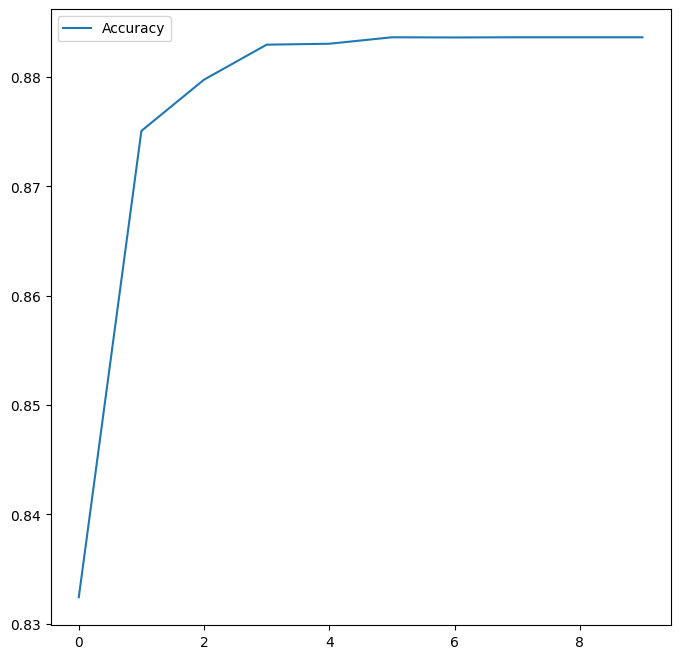

In [190]:
plt.figure(figsize=(8,8))
plt.plot(history.history['Accuracy'] , label='Accuracy')
plt.legend()
plt.show()


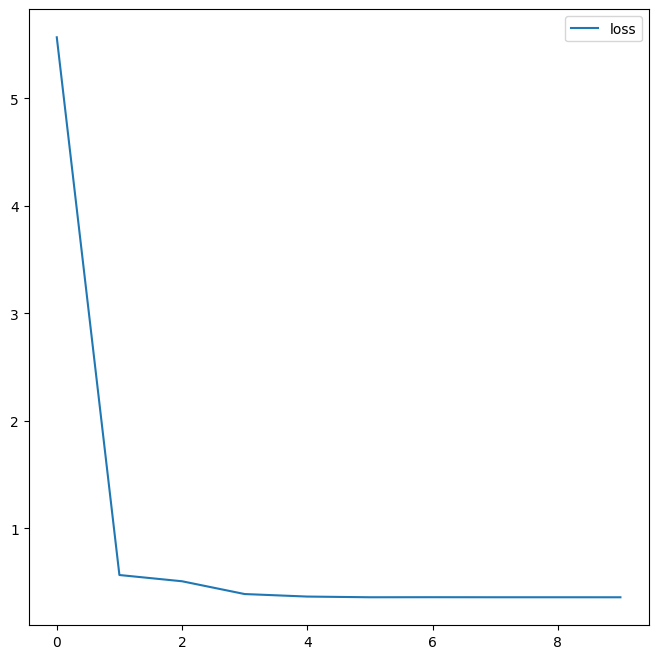

In [191]:
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'] , label='loss')
plt.legend()
plt.show()


## Save the Model
Save the trained model for submission.

In [192]:
model.save('rehab.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here: